# Mid Semester Project - DEEP Reinforcements Learning

### Name and ID:
Student 1: Jonathan Mendelson 308564293
<br>

# Pre-Requisit

## Installs

## Imports

In [71]:
# gym
import gymnasium
import minigrid
from minigrid.wrappers import RGBImgObsWrapper, RGBImgPartialObsWrapper, ImgObsWrapper, FullyObsWrapper, RGBImgPartialObsWrapper
import imageio

# general utils
import matplotlib.pyplot as plt
import os
import time

# torch
import torch
from torch.optim import AdamW
from torchsummary import summary
# device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# my imports
from src.display_utils import embed_mp4, launch_tb
from src.format_utils import preproess_obs
from src.model import ActCrit
from src.trainer import Trainer

# notebook setup
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Paths:

In [ ]:
# paths
video_dir = 'content'
models_dir = 'savepoints'
log_dir = 'logs'

#### Environment Initialization
##### Build Env:

In [56]:
# env options
env_names = ["MiniGrid-MultiRoom-N2-S4-v0", "MiniGrid-MultiRoom-N4-S5-v0","MiniGrid-MultiRoom-N6-v0"] 

# env config
highlight = False
render_mode = "rgb_array"

# wrap env
env = gymnasium.make(env_names[0], render_mode=render_mode, highlight=highlight)
env = RGBImgPartialObsWrapper(env) # Get pixel observations
env = ImgObsWrapper(env) # Get rid of the 'mission' field

##### Test the env and wrappers:

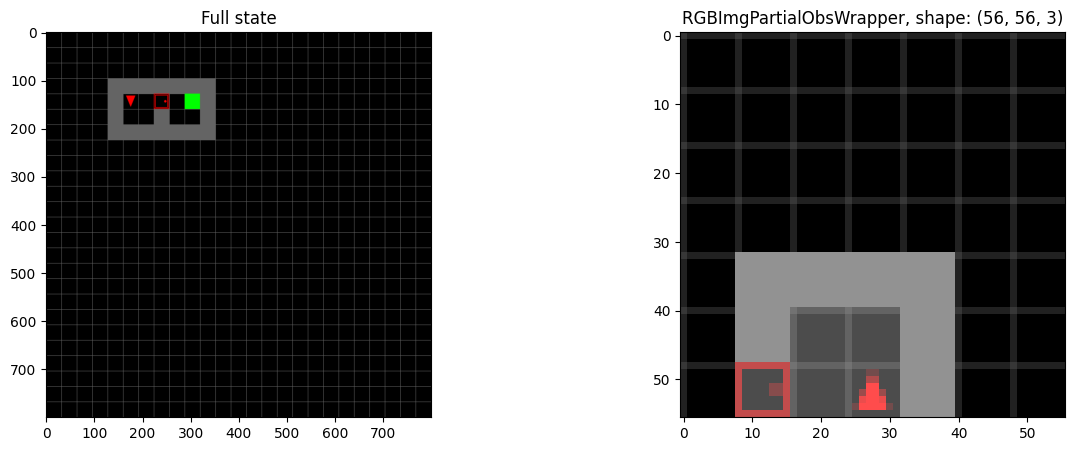

In [57]:
obs, _ = env.reset()
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
axs[1].imshow(obs)
axs[1].title.set_text(f'RGBImgPartialObsWrapper, shape: {obs.shape}')
axs[0].imshow(env.render())
axs[0].title.set_text('Full state')
plt.show()

#### Agent Initialization
The Actor-Critic model has an action space of 4, because of the 7 actions space, only 4 are used. The utility function `map_action` is used to scale from 4 to 7 actions.

In [58]:
AC_model = ActCrit(env.observation_space, action_space = 4)
AC_model = AC_model.to(device)
summary(AC_model, (3,56,56))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 55, 55]             208
              ReLU-2           [-1, 16, 55, 55]               0
         MaxPool2d-3           [-1, 16, 27, 27]               0
            Conv2d-4           [-1, 32, 26, 26]           2,080
              ReLU-5           [-1, 32, 26, 26]               0
            Conv2d-6           [-1, 64, 25, 25]           8,256
              ReLU-7           [-1, 64, 25, 25]               0
           Flatten-8                [-1, 40000]               0
            Linear-9                   [-1, 64]       2,560,064
             ReLU-10                   [-1, 64]               0
           Linear-11                    [-1, 4]             260
          Softmax-12                    [-1, 4]               0
           Linear-13                   [-1, 64]       2,560,064
             ReLU-14                   

#### Training Loop 
Logger:

In [76]:
experiment_name = 'A2C_01'

# create log dir
timestamp = time.strftime("%b-%d_%H-%M-%S")
log_path = os.path.join(log_dir, experiment_name, f'{timestamp}')
model_path = os.path.join(models_dir, experiment_name, f'{timestamp}')

In [78]:
tb_process, tb_writer = launch_tb(log_dir)

TensorBoard logs are saved in: logs


##### Training Loop:

In [ ]:
l_params = {'gamma':0.99, 'lr':1e-3, 'actor_lr_weight': 0.5, 'critic_lr_weight': 0.5}
optimizer = AdamW
a2c_trainer = Trainer(device, AC_model, tb_writer, model_path = model_path)

In [ ]:
Trainer.A2CTrain()

ValueError: Expected value argument (Tensor of shape (1,)) to be within the support (IntegerInterval(lower_bound=0, upper_bound=3)) of the distribution Categorical(probs: torch.Size([1, 4]), logits: torch.Size([1, 4])), but found invalid values:
tensor([5], device='cuda:0')

In [ ]:
env.close()
tb_process.kill()